## **N.B.**  



1.   Le notebook contient toutes les notions de base du cours
2.  Les exercices sont à la fin du notebook






# Premiers pas vers le NLP

# La Tonkénization : coder du texte

On va travailler avec du texte en anglais car plus simple que les autres langues pour un début !

# Etape 1

In [ ]:
# Cellule 1 : Tokenisation du texte

# Dans cette cellule, nous allons explorer le concept de tokenisation du texte en utilisant TensorFlow et Keras.
# La tokenisation consiste à diviser un texte en mots ou en "tokens".

# Importation des bibliothèques TensorFlow et Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# Les phrases que nous allons utiliser pour notre exemple
sentences = [
    'j\'aime mon chien',
    'J\'aime mon chat',
    'Tu aimes mon chien !'
]

# Création d'un objet Tokenizer pour traiter nos phrases
tokenizer = Tokenizer(num_words=100)  # Nous limitons le nombre de mots uniques à 100
tokenizer.fit_on_texts(sentences)  # Adaptation du Tokenizer aux phrases
word_index = tokenizer.word_index  # Création d'un index de mots basé sur les phrases
print("Index des mots :\n", word_index)



Index des mots :
 {'mon': 1, "j'aime": 2, 'chien': 3, 'chat': 4, 'tu': 5, 'aimes': 6}


# Vectorisation

**La vectorisation de texte **(TextVectorization) est un processus qui permet de **convertir du texte en une forme numérique**, c'est-à-dire de représenter des phrases ou des documents textuels sous forme de vecteurs numériques.

Cette représentation numérique est essentielle dans le domaine du traitement du langage naturel (NLP) et de l'apprentissage automatique, car la plupart des algorithmes et des modèles de machine learning travaillent avec des données numériques plutôt qu'avec du texte brut.

Voici comment fonctionne la vectorisation de texte à l'aide de l'objet TextVectorization dans TensorFlow et Keras :



In [ ]:
# Cellule 2 : Création d'un vecteur de texte

# Dans cette cellule, nous allons créer un vecteur numérique à partir du texte tokenisé.
# Cela nous permettra de représenter du texte sous forme de nombres.

# Importation des bibliothèques TensorFlow et Keras
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Création d'un objet TextVectorization
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=None,  # Nombre maximum de mots dans le vocabulaire
    standardize="lower_and_strip_punctuation",  # Normalisation du texte
    split="whitespace",  # Comment diviser les tokens
    ngrams=None,  # Créer des groupes de n mots
    output_mode="int",  # Comment mapper les tokens en nombres
    output_sequence_length=None  # Longueur de la séquence de sortie de tokens
)

# Adaptation de l'objet TextVectorization aux phrases
text_vectorizer.adapt(sentences)





In [ ]:
# Transformation des phrases en vecteurs numériques
text_vectorizer(sentences)

<tf.Tensor: shape=(3, 4), dtype=int64, numpy=
array([[3, 2, 4, 0],
       [3, 2, 6, 0],
       [5, 7, 2, 4]])>

In [ ]:

# Accédez au vocabulaire et aux codes numériques
vocab = text_vectorizer.get_vocabulary()
word_to_num = {word: num for num, word in enumerate(vocab)}

# Affichez le vocabulaire et les codes numériques
for word, num in word_to_num.items():
    print(f"Mot: {word}, Code Numérique: {num}")


Mot: , Code Numérique: 0
Mot: [UNK], Code Numérique: 1
Mot: mon, Code Numérique: 2
Mot: jaime, Code Numérique: 3
Mot: chien, Code Numérique: 4
Mot: tu, Code Numérique: 5
Mot: chat, Code Numérique: 6
Mot: aimes, Code Numérique: 7


In [ ]:
# Supposons que ce soit le vecteur numérique que vous avez : [2, 4, 1, 3] ou [2, 4, 1, 0]

# 1. Accédez au vocabulaire de text_vectorizer
vocab = text_vectorizer.get_vocabulary()

# 2. Utilisez chaque nombre pour obtenir le mot correspondant dans le vocabulaire
#words = [vocab[i] for i in [2, 4, 1, 3]]
#words = [vocab[i] for i in [2, 4, 1, 5]]
words = [vocab[i] for i in [3, 6, 3, 0]]

# 3. Réassemblez les mots pour reconstituer la phrase
reconstructed_sentence = ' '.join(words)

# Maintenant, `reconstructed_sentence` contient la phrase d'origine : "j'aime mon chien"
reconstructed_sentence

'jaime chat jaime '

# Embeding

**L'embedding** de mots est une technique permettant de **représenter des mots sous forme de vecteurs numériques d'une dimension spécifiée**.

L'idée est de créer une représentation dense de chaque mot de telle sorte que des mots similaires aient des vecteurs similaires, ce qui peut améliorer les performances des modèles de traitement du langage naturel.

Pour effectuer l'embedding de mots, vous pouvez utiliser des méthodes comme Word2Vec, GloVe ou utiliser des couches d'embedding dans des modèles de deep learning.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding

# Supposons que vous avez déjà créé un vocabulaire et un objet TextVectorization adapté
# vocab = text_vectorizer.get_vocabulary()

# Créez une couche d'embedding
embedding_layer = Embedding(input_dim=len(vocab), output_dim=5)  # Input dimension est la taille du vocabulaire, output_dim est la dimension de l'embedding

# Vous pouvez obtenir les embeddings des phrases en utilisant l'objet TextVectorization
vectorized_sentences = text_vectorizer(sentences)

# Appliquez la couche d'embedding aux phrases
word_embeddings = embedding_layer(vectorized_sentences)

# Maintenant, word_embeddings contient les vecteurs d'embedding de chaque mot dans les phrases

# Affichons les embeddings pour la première phrase
print("Embeddings pour la première phrase:")
print(word_embeddings[0])

# Note : Output dimension est défini comme 5, donc chaque mot est représenté par un vecteur de dimension 5.


Embeddings pour la première phrase:
tf.Tensor(
[[ 0.0153718  -0.04605297 -0.02552157  0.04857255  0.01832442]
 [ 0.04329989 -0.03063611  0.02667874  0.02805557 -0.00688602]
 [ 0.04587061  0.04615489  0.03047362  0.00213258  0.00704758]
 [-0.02605387 -0.00581176  0.01910121 -0.0400977  -0.03093602]], shape=(4, 5), dtype=float32)


tokenization: associer des jetons à des mots et à chaque jeton on associe un indice.
vectorization: représenter la phrase sous forme de vecteur
embedding: représenter chaque mot par un vecteur pour avoir plus de contexte
c moi qu'a écrit ça lol

In [ ]:
print(word_embeddings)

tf.Tensor(
[[[-0.01115525 -0.01321278 -0.00050437  0.04403123 -0.01156881]
  [ 0.0253389   0.02591047  0.01117456 -0.00707042  0.04226584]
  [-0.01991855  0.02421213 -0.01960812  0.02483218  0.02552995]
  [ 0.03814786  0.00144131  0.02810707  0.03539428 -0.01316331]]

 [[-0.01115525 -0.01321278 -0.00050437  0.04403123 -0.01156881]
  [ 0.0253389   0.02591047  0.01117456 -0.00707042  0.04226584]
  [-0.03645879  0.03153285 -0.01131342 -0.01022825 -0.03288976]
  [ 0.03814786  0.00144131  0.02810707  0.03539428 -0.01316331]]

 [[ 0.03523919  0.02842515  0.00550606  0.03796661 -0.04234092]
  [-0.01461671  0.02043873  0.03684011 -0.00097592 -0.03259202]
  [ 0.0253389   0.02591047  0.01117456 -0.00707042  0.04226584]
  [-0.01991855  0.02421213 -0.01960812  0.02483218  0.02552995]]], shape=(3, 4, 5), dtype=float32)



1.  Dans cet exemple, nous avons créé une couche d'embedding avec une dimension de sortie de 5. Cette couche est utilisée pour transformer les indices des mots dans les phrases en vecteurs d'embedding. **Chaque mot est représenté par un vecteur de dimension 5** dans cet exemple.



   
2.   Les embeddings appris dépendent de la tâche pour laquelle ils sont utilisés. **Plus la dimension d'embedding est grande, plus la représentation est riche en informations**, mais elle nécessite également plus de données pour l'apprentissage. L'embedding de mots est souvent utilisé comme couche d'entrée dans des modèles de traitement du langage naturel pour améliorer les performances de la tâche en cours, comme la classification de texte ou la génération de texte.





####################################

# embedding Word2Vec

La principale différence entre Word2Vec et la couche d'embedding de Keras réside dans leur fonction et leur processus de création :

1. **Word2Vec** :
   - **Fonction** : Word2Vec est un algorithme de traitement du langage naturel (NLP) qui vise à créer des embeddings de mots, c'est-à-dire des représentations vectorielles de mots à partir de grands corpus textuels.
   - **Processus** : Word2Vec apprend ces embeddings de mots en analysant le contexte d'un mot donné dans un corpus textuel. Il crée des vecteurs de telle sorte que les mots similaires dans le contexte se trouvent à proximité les uns des autres dans l'espace vectoriel. Word2Vec peut être pré-entraîné sur de vastes ensembles de données textuelles, et ces embeddings peuvent être utilisés dans diverses tâches de NLP.

2. **Couche d'embedding de Keras** :
   - **Fonction** : La couche d'embedding de Keras est une couche intégrée dans le framework Keras qui permet d'apprendre des embeddings de mots spécifiques à une tâche donnée dans le cadre d'un modèle d'apprentissage profond.
   - **Processus** : Contrairement à Word2Vec, la couche d'embedding de Keras est intégrée dans le modèle Keras et apprend les embeddings en même temps que le modèle lors de l'entraînement. Elle crée des embeddings spécifiques à la tâche que le modèle doit accomplir. Ces embeddings sont adaptés à la tâche spécifique pour laquelle le modèle est construit.

En résumé, Word2Vec est un algorithme d'apprentissage non supervisé utilisé pour créer des embeddings de mots généraux à partir de grands corpus textuels, tandis que la couche d'embedding de Keras est utilisée pour apprendre des embeddings de mots spécifiques à une tâche donnée dans le cadre d'un modèle d'apprentissage profond. La principale différence réside dans l'objectif de création des embeddings et le moment de leur utilisation.

################


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding

# Création d'un dictionnaire de correspondance mot-indice (c'est un exemple, vous devrez créer le vôtre)
word_to_index = {"J'aime": 1, "le": 2, "machine": 3, "learning": 4}

# Phrase d'origine
input_sentence = "J'aime le machine learning"

# Tokenisation de la phrase en une liste de mots
input_tokens = input_sentence.split()

# Conversion des mots en indices (entiers) en utilisant le dictionnaire
input_indices = [word_to_index[word] for word in input_tokens]

# Conversion des indices en un tenseur TensorFlow
input_indices_tensor = tf.constant(input_indices)

# Création d'une couche d'embedding de démonstration
embedding_layer = Embedding(input_dim=5, output_dim=3, input_length=len(input_indices))

# Conversion des indices en vecteurs incorporés en utilisant la couche d'embedding
embedded_sentence = embedding_layer(input_indices_tensor)

# Affichage de la phrase d'origine
print("Phrase d'origine:", input_sentence)

# Affichage de la phrase incorporée
print("Phrase incorporée:", embedded_sentence)


Phrase d'origine: J'aime le machine learning
Phrase incorporée: tf.Tensor(
[[-0.00718447 -0.01964766  0.01161158]
 [-0.01435472 -0.02540084 -0.02452683]
 [-0.00638775  0.01984673 -0.03509568]
 [-0.00889345 -0.02040696 -0.01045429]], shape=(4, 3), dtype=float32)


# Etape 2

In [ ]:
# Phrases d'exemple
sentences = [
    'I love my dog',
    'I, love my cat',
    'You love my dog!'
]

# Création d'un objet Tokenizer
tokenizer = Tokenizer(num_words=100)  # Limite de mots uniques à 100

# Adaptation du Tokenizer aux phrases
tokenizer.fit_on_texts(sentences)

# Création d'un index de mots basé sur les phrases
word_index = tokenizer.word_index

# Affichage de l'index des mots
print("Index des mots :\n", word_index)

# Affichage des phrases d'origine
print("Phrases d'origine :")
for sentence in sentences:
    print(sentence)

# Conversion des phrases en séquences de nombres
sequences = tokenizer.texts_to_sequences(sentences)

# Affichage des séquences numériques correspondant aux phrases
print("Séquences numériques :\n", sequences)

# Phrase de test sous forme de séquence numérique
sequence_test = [[3, 1, 2]]

# Conversion de la séquence numérique en une phrase
sentence_test = tokenizer.sequences_to_texts(sequence_test)

# Affichage de la phrase générée à partir de la séquence
print("Phrase générée à partir de la séquence :\n", sentence_test)


Index des mots :
 {'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
Phrases d'origine :
I love my dog
I, love my cat
You love my dog!
Séquences numériques :
 [[3, 1, 2, 4], [3, 1, 2, 5], [6, 1, 2, 4]]
Phrase générée à partir de la séquence :
 ['i love my']


# Etape 3

In [ ]:
# Étape 1 : Importation des bibliothèques et téléchargement du jeu de données
!gdown --id 1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj

import csv
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Étape 2 : Chargement du jeu de données
data_bbc = pd.read_csv("bbc-text.csv")
data_bbc.head()




/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj
To: /content/bbc-text.csv
100% 5.06M/5.06M [00:00<00:00, 197MB/s]


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_6.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data_bbc.iloc[0, 1]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [ ]:
# Étape 3 : Prétraitement du texte
# Définir la liste des mots vides (stopwords) ici s'il n'est pas déjà défini.
# stopwords = [...]


#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
# Convert it to a Python list and paste it here
# stopwords = #YOUR CODE HERE
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]



# Étape 4 : Lecture du fichier CSV
sentences = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)

    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        # Suppression des stopwords
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)

# Étape 5 : Tokenisation du texte
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

# Affichage de la longueur du vocabulaire
print("Longueur du vocabulaire :", len(word_index))


Longueur du vocabulaire : 29714


In [ ]:

# Étape 6 : Conversion du texte en séquences
sequences = tokenizer.texts_to_sequences(sentences)
print('La première séquence :', sequences[0])
print('Longueur de la première séquence :', len(sequences[0]))


La première séquence : [96, 176, 1158, 1221, 54, 1123, 742, 5215, 85, 1074, 4271, 147, 184, 4131, 1346, 1312, 1597, 47, 9, 949, 96, 4, 6518, 329, 92, 23, 17, 140, 3129, 1332, 2521, 577, 419, 1278, 72, 2963, 3047, 1756, 10, 894, 4, 755, 12, 954, 19516, 11, 656, 1579, 1053, 414, 4, 2002, 1221, 779, 54, 503, 1500, 2115, 1654, 135, 333, 123, 2745, 818, 5216, 1089, 610, 12, 4418, 3851, 894, 2581, 147, 351, 184, 4131, 8816, 5801, 44, 73, 3218, 31, 11, 2, 5477, 22, 2, 1398, 145, 454, 9, 138, 1399, 82, 4602, 489, 5217, 96, 1053, 87, 6519, 83, 2116, 63, 8817, 96, 8, 1124, 621, 85, 1074, 96, 1971, 148, 159, 420, 11, 2879, 46, 56, 149, 1222, 85, 1074, 4419, 5, 13, 9, 489, 5217, 3130, 13, 8, 2694, 6970, 412, 1098, 8818, 1377, 617, 1400, 2081, 14975, 756, 11, 503, 1500, 2115, 135, 1919, 410, 895, 2082, 1620, 43, 1820, 2582, 5000, 5478, 2522, 251, 11, 2636, 83, 819, 8, 1090, 1134, 149, 798, 578, 8819, 136, 31, 1398, 1821, 445, 4, 90, 955, 117, 23, 17, 22, 3397, 19517, 42, 1456, 2, 12600, 28, 42, 99,

In [ ]:

# Étape 7 : Rembourrage des séquences
padded = pad_sequences(sequences, padding='post')
print("Séquence rembourrée :", padded[0])
print("Forme des données rembourrées :", padded.shape)
print("Longueur de la première séquence rembourrée :", len(padded[0]))

Séquence rembourrée : [  96  176 1158 ...    0    0    0]
Forme des données rembourrées : (2225, 2442)
Longueur de la première séquence rembourrée : 2442


In [ ]:
print(word_index)

{'<OOV>': 1, 's': 2, 'said': 3, 'will': 4, 'not': 5, 'mr': 6, 'year': 7, 'also': 8, 'people': 9, 'new': 10, 'us': 11, 'one': 12, 'can': 13, 'last': 14, 'first': 15, 't': 16, 'time': 17, 'two': 18, 'world': 19, 'government': 20, 'now': 21, 'uk': 22, 'years': 23, 'no': 24, 'best': 25, 'just': 26, 'make': 27, 'told': 28, 'get': 29, 'film': 30, 'like': 31, 'game': 32, 'made': 33, 'back': 34, 'music': 35, 'many': 36, 'three': 37, '000': 38, 'labour': 39, 'next': 40, '1': 41, 'bbc': 42, 'well': 43, 'set': 44, 'number': 45, 'take': 46, 'way': 47, 'added': 48, 'market': 49, '2': 50, 'may': 51, 'says': 52, 'company': 53, 'home': 54, 'election': 55, 'off': 56, 'good': 57, '2004': 58, 'going': 59, 'party': 60, 'still': 61, 'games': 62, 'much': 63, 'england': 64, 'win': 65, '6': 66, 'go': 67, 'work': 68, 'since': 69, 'firm': 70, 'second': 71, 'show': 72, 'top': 73, 'blair': 74, 'won': 75, 'think': 76, 'week': 77, 'use': 78, 'say': 79, 'million': 80, 'part': 81, 'play': 82, 'technology': 83, 'minis

_______________________________________

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>") ### YOUR CODE HERE
tokenizer.fit_on_texts(sentences) ### YOUR CODE HERE)
word_index = tokenizer.word_index ### YOUR CODE HERE
print(len(word_index)) ### YOUR CODE HERE)
# Expected output
# 29714

29714


In [ ]:
print(word_index)

{'<OOV>': 1, 's': 2, 'said': 3, 'will': 4, 'not': 5, 'mr': 6, 'year': 7, 'also': 8, 'people': 9, 'new': 10, 'us': 11, 'one': 12, 'can': 13, 'last': 14, 'first': 15, 't': 16, 'time': 17, 'two': 18, 'world': 19, 'government': 20, 'now': 21, 'uk': 22, 'years': 23, 'no': 24, 'best': 25, 'just': 26, 'make': 27, 'told': 28, 'get': 29, 'film': 30, 'like': 31, 'game': 32, 'made': 33, 'back': 34, 'music': 35, 'many': 36, 'three': 37, '000': 38, 'labour': 39, 'next': 40, '1': 41, 'bbc': 42, 'well': 43, 'set': 44, 'number': 45, 'take': 46, 'way': 47, 'added': 48, 'market': 49, '2': 50, 'may': 51, 'says': 52, 'company': 53, 'home': 54, 'election': 55, 'off': 56, 'good': 57, '2004': 58, 'going': 59, 'party': 60, 'still': 61, 'games': 62, 'much': 63, 'england': 64, 'win': 65, '6': 66, 'go': 67, 'work': 68, 'since': 69, 'firm': 70, 'second': 71, 'show': 72, 'top': 73, 'blair': 74, 'won': 75, 'think': 76, 'week': 77, 'use': 78, 'say': 79, 'million': 80, 'part': 81, 'play': 82, 'technology': 83, 'minis

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences) ### YOUR CODE HERE
print('la sequence première:----------', sequences[0])
print('sa longueur:--------------', len(sequences[0]))

la sequence première:---------- [96, 176, 1158, 1221, 54, 1123, 742, 5215, 85, 1074, 4271, 147, 184, 4131, 1346, 1312, 1597, 47, 9, 949, 96, 4, 6518, 329, 92, 23, 17, 140, 3129, 1332, 2521, 577, 419, 1278, 72, 2963, 3047, 1756, 10, 894, 4, 755, 12, 954, 19516, 11, 656, 1579, 1053, 414, 4, 2002, 1221, 779, 54, 503, 1500, 2115, 1654, 135, 333, 123, 2745, 818, 5216, 1089, 610, 12, 4418, 3851, 894, 2581, 147, 351, 184, 4131, 8816, 5801, 44, 73, 3218, 31, 11, 2, 5477, 22, 2, 1398, 145, 454, 9, 138, 1399, 82, 4602, 489, 5217, 96, 1053, 87, 6519, 83, 2116, 63, 8817, 96, 8, 1124, 621, 85, 1074, 96, 1971, 148, 159, 420, 11, 2879, 46, 56, 149, 1222, 85, 1074, 4419, 5, 13, 9, 489, 5217, 3130, 13, 8, 2694, 6970, 412, 1098, 8818, 1377, 617, 1400, 2081, 14975, 756, 11, 503, 1500, 2115, 135, 1919, 410, 895, 2082, 1620, 43, 1820, 2582, 5000, 5478, 2522, 251, 11, 2636, 83, 819, 8, 1090, 1134, 149, 798, 578, 8819, 136, 31, 1398, 1821, 445, 4, 90, 955, 117, 23, 17, 22, 3397, 19517, 42, 1456, 2, 12600, 28

In [ ]:

padded = pad_sequences(sequences, padding='post') ### YOUR CODE HERE
print(padded[0])
print(padded.shape)
print(len(padded[0]))
# Expected output
# [  96  176 1158 ...    0    0    0]
# (2225, 2442)

[  96  176 1158 ...    0    0    0]
(2225, 2442)
2442


In [ ]:
# comprendre le pad

sequence_de_test = [[1], [2, 3], [4, 5, 6]]
print('pad avant', tf.keras.preprocessing.sequence.pad_sequences(sequence_de_test, padding='pre'))
print('pad après', tf.keras.preprocessing.sequence.pad_sequences(sequence_de_test, padding = 'post'))



pad avant [[0 0 1]
 [0 2 3]
 [4 5 6]]
pad après [[1 0 0]
 [2 3 0]
 [4 5 6]]


In [ ]:
sequence_de_test = [[1], [2], [4,6]]
print('pad avant', tf.keras.preprocessing.sequence.pad_sequences(sequence_de_test, padding='pre'))
print('pad après', tf.keras.preprocessing.sequence.pad_sequences(sequence_de_test, padding = 'post'))


pad avant [[0 1]
 [0 2]
 [4 6]]
pad après [[1 0]
 [2 0]
 [4 6]]


In [ ]:
### START CODE HERE

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)

### END CODE HERE

print(label_seq)
print(label_word_index)
# Expected Output
# [[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2], [1], [2], [1], [4], [5], [2], [3], [3], [5], [1], [5], [3], [1], [5], [1], [1], [5], [1], [3], [3], [5], [4], [1], [3], [2], [5], [4], [1], [4], [1], [5], [3], [1], [5], [4], [2], [4], [2], [2], [4], [2], [1], [2], [1], [2], [1], [5], [2], [2], [5], [1], [1], [3], [4], [3], [3], [3], [4], [1], [4], [3], [2], [4], [5], [4], [1], [1], [2], [2], [3], [2], [4], [1], [5], [1], [3], [4], [5], [2], [1], [5], [1], [4], [3], [4], [2], [2], [3], [3], [1], [2], [4], [5], [3], [4], [2], [5], [1], [5], [1], [5], [3], [2], [1], [2], [1], [1], [5], [1], [3], [3], [2], [5], [4], [2], [1], [2], [5], [2], [2], [2], [3], [2], [3], [5], [5], [2], [1], [2], [3], [2], [4], [5], [2], [1], [1], [5], [2], [2], [3], [4], [5], [4], [3], [2], [1], [3], [2], [5], [4], [5], [4], [3], [1], [5], [2], [3], [2], [2], [3], [1], [4], [2], [2], [5], [5], [4], [1], [2], [5], [4], [4], [5], [5], [5], [3], [1], [3], [4], [2], [5], [3], [2], [5], [3], [3], [1], [1], [2], [3], [5], [2], [1], [2], [2], [1], [2], [3], [3], [3], [1], [4], [4], [2], [4], [1], [5], [2], [3], [2], [5], [2], [3], [5], [3], [2], [4], [2], [1], [1], [2], [1], [1], [5], [1], [1], [1], [4], [2], [2], [2], [3], [1], [1], [2], [4], [2], [3], [1], [3], [4], [2], [1], [5], [2], [3], [4], [2], [1], [2], [3], [2], [2], [1], [5], [4], [3], [4], [2], [1], [2], [5], [4], [4], [2], [1], [1], [5], [3], [3], [3], [1], [3], [4], [4], [5], [3], [4], [5], [2], [1], [1], [4], [2], [1], [1], [3], [1], [1], [2], [1], [5], [4], [3], [1], [3], [4], [2], [2], [2], [4], [2], [2], [1], [1], [1], [1], [2], [4], [5], [1], [1], [4], [2], [4], [5], [3], [1], [2], [3], [2], [4], [4], [3], [4], [2], [1], [2], [5], [1], [3], [5], [1], [1], [3], [4], [5], [4], [1], [3], [2], [5], [3], [2], [5], [1], [1], [4], [3], [5], [3], [5], [3], [4], [3], [5], [1], [2], [1], [5], [1], [5], [4], [2], [1], [3], [5], [3], [5], [5], [5], [3], [5], [4], [3], [4], [4], [1], [1], [4], [4], [1], [5], [5], [1], [4], [5], [1], [1], [4], [2], [3], [4], [2], [1], [5], [1], [5], [3], [4], [5], [5], [2], [5], [5], [1], [4], [4], [3], [1], [4], [1], [3], [3], [5], [4], [2], [4], [4], [4], [2], [3], [3], [1], [4], [2], [2], [5], [5], [1], [4], [2], [4], [5], [1], [4], [3], [4], [3], [2], [3], [3], [2], [1], [4], [1], [4], [3], [5], [4], [1], [5], [4], [1], [3], [5], [1], [4], [1], [1], [3], [5], [2], [3], [5], [2], [2], [4], [2], [5], [4], [1], [4], [3], [4], [3], [2], [3], [5], [1], [2], [2], [2], [5], [1], [2], [5], [5], [1], [5], [3], [3], [3], [1], [1], [1], [4], [3], [1], [3], [3], [4], [3], [1], [2], [5], [1], [2], [2], [4], [2], [5], [5], [5], [2], [5], [5], [3], [4], [2], [1], [4], [1], [1], [3], [2], [1], [4], [2], [1], [4], [1], [1], [5], [1], [2], [1], [2], [4], [3], [4], [2], [1], [1], [2], [2], [2], [2], [3], [1], [2], [4], [2], [1], [3], [2], [4], [2], [1], [2], [3], [5], [1], [2], [3], [2], [5], [2], [2], [2], [1], [3], [5], [1], [3], [1], [3], [3], [2], [2], [1], [4], [5], [1], [5], [2], [2], [2], [4], [1], [4], [3], [4], [4], [4], [1], [4], [4], [5], [5], [4], [1], [5], [4], [1], [1], [2], [5], [4], [2], [1], [2], [3], [2], [5], [4], [2], [3], [2], [4], [1], [2], [5], [2], [3], [1], [5], [3], [1], [2], [1], [3], [3], [1], [5], [5], [2], [2], [1], [4], [4], [1], [5], [4], [4], [2], [1], [5], [4], [1], [1], [2], [5], [2], [2], [2], [5], [1], [5], [4], [4], [4], [3], [4], [4], [5], [5], [1], [1], [3], [2], [5], [1], [3], [5], [4], [3], [4], [4], [2], [5], [3], [4], [3], [3], [1], [3], [3], [5], [4], [1], [3], [1], [5], [3], [2], [2], [3], [1], [1], [1], [5], [4], [4], [2], [5], [1], [3], [4], [3], [5], [4], [4], [2], [2], [1], [2], [2], [4], [3], [5], [2], [2], [2], [2], [2], [4], [1], [3], [4], [4], [2], [2], [5], [3], [5], [1], [4], [1], [5], [1], [4], [1], [2], [1], [3], [3], [5], [2], [1], [3], [3], [1], [5], [3], [2], [4], [1], [2], [2], [2], [5], [5], [4], [4], [2], [2], [5], [1], [2], [5], [4], [4], [2], [2], [1], [1], [1], [3], [3], [1], [3], [1], [2], [5], [1], [4], [5], [1], [1], [2], [2], [4], [4], [1], [5], [1], [5], [1], [5], [3], [5], [5], [4], [5], [2], [2], [3], [1], [3], [4], [2], [3], [1], [3], [1], [5], [1], [3], [1], [1], [4], [5], [1], [3], [1], [1], [2], [4], [5], [3], [4], [5], [3], [5], [3], [5], [5], [4], [5], [3], [5], [5], [4], [4], [1], [1], [5], [5], [4], [5], [3], [4], [5], [2], [4], [1], [2], [5], [5], [4], [5], [4], [2], [5], [1], [5], [2], [1], [2], [1], [3], [4], [5], [3], [2], [5], [5], [3], [2], [5], [1], [3], [1], [2], [2], [2], [2], [2], [5], [4], [1], [5], [5], [2], [1], [4], [4], [5], [1], [2], [3], [2], [3], [2], [2], [5], [3], [2], [2], [4], [3], [1], [4], [5], [3], [2], [2], [1], [5], [3], [4], [2], [2], [3], [2], [1], [5], [1], [5], [4], [3], [2], [2], [4], [2], [2], [1], [2], [4], [5], [3], [2], [3], [2], [1], [4], [2], [3], [5], [4], [2], [5], [1], [3], [3], [1], [3], [2], [4], [5], [1], [1], [4], [2], [1], [5], [4], [1], [3], [1], [2], [2], [2], [3], [5], [1], [3], [4], [2], [2], [4], [5], [5], [4], [4], [1], [1], [5], [4], [5], [1], [3], [4], [2], [1], [5], [2], [2], [5], [1], [2], [1], [4], [3], [3], [4], [5], [3], [5], [2], [2], [3], [1], [4], [1], [1], [1], [3], [2], [1], [2], [4], [1], [2], [2], [1], [3], [4], [1], [2], [4], [1], [1], [2], [2], [2], [2], [3], [5], [4], [2], [2], [1], [2], [5], [2], [5], [1], [3], [2], [2], [4], [5], [2], [2], [2], [3], [2], [3], [4], [5], [3], [5], [1], [4], [3], [2], [4], [1], [2], [2], [5], [4], [2], [2], [1], [1], [5], [1], [3], [1], [2], [1], [2], [3], [3], [2], [3], [4], [5], [1], [2], [5], [1], [3], [3], [4], [5], [2], [3], [3], [1], [4], [2], [1], [5], [1], [5], [1], [2], [1], [3], [5], [4], [2], [1], [3], [4], [1], [5], [2], [1], [5], [1], [4], [1], [4], [3], [1], [2], [5], [4], [4], [3], [4], [5], [4], [1], [2], [4], [2], [5], [1], [4], [3], [3], [3], [3], [5], [5], [5], [2], [3], [3], [1], [1], [4], [1], [3], [2], [2], [4], [1], [4], [2], [4], [3], [3], [1], [2], [3], [1], [2], [4], [2], [2], [5], [5], [1], [2], [4], [4], [3], [2], [3], [1], [5], [5], [3], [3], [2], [2], [4], [4], [1], [1], [3], [4], [1], [4], [2], [1], [2], [3], [1], [5], [2], [4], [3], [5], [4], [2], [1], [5], [4], [4], [5], [3], [4], [5], [1], [5], [1], [1], [1], [3], [4], [1], [2], [1], [1], [2], [4], [1], [2], [5], [3], [4], [1], [3], [4], [5], [3], [1], [3], [4], [2], [5], [1], [3], [2], [4], [4], [4], [3], [2], [1], [3], [5], [4], [5], [1], [4], [2], [3], [5], [4], [3], [1], [1], [2], [5], [2], [2], [3], [2], [2], [3], [4], [5], [3], [5], [5], [2], [3], [1], [3], [5], [1], [5], [3], [5], [5], [5], [2], [1], [3], [1], [5], [4], [4], [2], [3], [5], [2], [1], [2], [3], [3], [2], [1], [4], [4], [4], [2], [3], [3], [2], [1], [1], [5], [2], [1], [1], [3], [3], [3], [5], [3], [2], [4], [2], [3], [5], [5], [2], [1], [3], [5], [1], [5], [3], [3], [2], [3], [1], [5], [5], [4], [4], [4], [4], [3], [4], [2], [4], [1], [1], [5], [2], [4], [5], [2], [4], [1], [4], [5], [5], [3], [3], [1], [2], [2], [4], [5], [1], [3], [2], [4], [5], [3], [1], [5], [3], [3], [4], [1], [3], [2], [3], [5], [4], [1], [3], [5], [5], [2], [1], [4], [4], [1], [5], [4], [3], [4], [1], [3], [3], [1], [5], [1], [3], [1], [4], [5], [1], [5], [2], [2], [5], [5], [5], [4], [1], [2], [2], [3], [3], [2], [3], [5], [1], [1], [4], [3], [1], [2], [1], [2], [4], [1], [1], [2], [5], [1], [1], [4], [1], [2], [3], [2], [5], [4], [5], [3], [2], [5], [3], [5], [3], [3], [2], [1], [1], [1], [4], [4], [1], [3], [5], [4], [1], [5], [2], [5], [3], [2], [1], [4], [2], [1], [3], [2], [5], [5], [5], [3], [5], [3], [5], [1], [5], [1], [3], [3], [2], [3], [4], [1], [4], [1], [2], [3], [4], [5], [5], [3], [5], [3], [1], [1], [3], [2], [4], [1], [3], [3], [5], [1], [3], [3], [2], [4], [4], [2], [4], [1], [1], [2], [3], [2], [4], [1], [4], [3], [5], [1], [2], [1], [5], [4], [4], [1], [3], [1], [2], [1], [2], [1], [1], [5], [5], [2], [4], [4], [2], [4], [2], [2], [1], [1], [3], [1], [4], [1], [4], [1], [1], [2], [2], [4], [1], [2], [4], [4], [3], [1], [2], [5], [5], [4], [3], [1], [1], [4], [2], [4], [5], [5], [3], [3], [2], [5], [1], [5], [5], [2], [1], [3], [4], [2], [1], [5], [4], [3], [3], [1], [1], [2], [2], [2], [2], [2], [5], [2], [3], [3], [4], [4], [5], [3], [5], [2], [3], [1], [1], [2], [4], [2], [4], [1], [2], [2], [3], [1], [1], [3], [3], [5], [5], [3], [2], [3], [3], [2], [4], [3], [3], [3], [3], [3], [5], [5], [4], [3], [1], [3], [1], [4], [1], [1], [1], [5], [4], [5], [4], [1], [4], [1], [1], [5], [5], [2], [5], [5], [3], [2], [1], [4], [4], [3], [2], [1], [2], [5], [1], [3], [5], [1], [1], [2], [3], [4], [4], [2], [2], [1], [3], [5], [1], [1], [3], [5], [4], [1], [5], [2], [3], [1], [3], [4], [5], [1], [3], [2], [5], [3], [5], [3], [1], [3], [2], [2], [3], [2], [4], [1], [2], [5], [2], [1], [1], [5], [4], [3], [4], [3], [3], [1], [1], [1], [2], [4], [5], [2], [1], [2], [1], [2], [4], [2], [2], [2], [2], [1], [1], [1], [2], [2], [5], [2], [2], [2], [1], [1], [1], [4], [2], [1], [1], [1], [2], [5], [4], [4], [4], [3], [2], [2], [4], [2], [4], [1], [1], [3], [3], [3], [1], [1], [3], [3], [4], [2], [1], [1], [1], [1], [2], [1], [2], [2], [2], [2], [1], [3], [1], [4], [4], [1], [4], [2], [5], [2], [1], [2], [4], [4], [3], [5], [2], [5], [2], [4], [3], [5], [3], [5], [5], [4], [2], [4], [4], [2], [3], [1], [5], [2], [3], [5], [2], [4], [1], [4], [3], [1], [3], [2], [3], [3], [2], [2], [2], [4], [3], [2], [3], [2], [5], [3], [1], [3], [3], [1], [5], [4], [4], [2], [4], [1], [2], [2], [3], [1], [4], [4], [4], [1], [5], [1], [3], [2], [3], [3], [5], [4], [2], [4], [1], [5], [5], [1], [2], [5], [4], [4], [1], [5], [2], [3], [3], [3], [4], [4], [2], [3], [2], [3], [3], [5], [1], [4], [2], [4], [5], [4], [4], [1], [3], [1], [1], [3], [5], [5], [2], [3], [3], [1], [2], [2], [4], [2], [4], [4], [1], [2], [3], [1], [2], [2], [1], [4], [1], [4], [5], [1], [1], [5], [2], [4], [1], [1], [3], [4], [2], [3], [1], [1], [3], [5], [4], [4], [4], [2], [1], [5], [5], [4], [2], [3], [4], [1], [1], [4], [4], [3], [2], [1], [5], [5], [1], [5], [4], [4], [2], [2], [2], [1], [1], [4], [1], [2], [4], [2], [2], [1], [2], [3], [2], [2], [4], [2], [4], [3], [4], [5], [3], [4], [5], [1], [3], [5], [2], [4], [2], [4], [5], [4], [1], [2], [2], [3], [5], [3], [1]]
# {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2],

# Le Prétraitement de texte



Étape 5 - Séquences avant le padding : [[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]

Word Index = {'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}

Séquences rembourrées :
[[ 0  0  0  4  2  1  3]
 [ 0  0  0  4  2  1  6]
 [ 0  0  0  5  2  1  3]
 [ 7  5  8  1  3  9 10]]

Word Index (après gestion OOV) = {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Nouvelles séquences :
[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Séquences de test rembourrées :
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Étape 1 : Définir les phrases d'entraînement
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

In [ ]:

# Étape 2 : Initialiser un Tokenizer avec un nombre maximal de mots
tokenizer = Tokenizer(num_words=100)

In [ ]:
# Étape 3 : Adapter le Tokenizer aux phrases d'entraînement
tokenizer.fit_on_texts(sentences)

In [ ]:
# Étape 4 : Créer un index de mots
word_index = tokenizer.word_index

In [ ]:
# Étape 5 : Convertir les phrases en séquences numériques
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
# Afficher les résultats
print('\nÉtape 5 - Séquences avant le padding :', sequences)


Étape 5 - Séquences avant le padding : [[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [ ]:
padded= pad_sequences(sequences)
# Afficher les résultats
print("\nWord Index =", word_index)
print("\nSéquences rembourrées :")
print(padded)

# Essayer avec des mots non déjà vus par le Tokenizer
test_data = [
    'I really love my dog',
    'My dog loves my class'
]



Word Index = {'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}

Séquences rembourrées :
[[ 0  0  0  4  2  1  3]
 [ 0  0  0  4  2  1  6]
 [ 0  0  0  5  2  1  3]
 [ 7  5  8  1  3  9 10]]


In [ ]:
# Étape 7 : Adapter le Tokenizer avec gestion des mots inconnus (OOV)
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [ ]:
# Étape 8 : Convertir les nouvelles phrases en séquences numériques
test_seq = tokenizer.texts_to_sequences(test_data)

In [ ]:
# Étape 9 : Rembourrer les séquences de test
padded = pad_sequences(test_seq, maxlen=10)

In [ ]:
# Afficher les résultats
print("\nWord Index (après gestion OOV) =", word_index)
print("\nNouvelles séquences :")
print(test_seq)
print("\nSéquences de test rembourrées :")
print(padded)


Word Index (après gestion OOV) = {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Nouvelles séquences :
[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Séquences de test rembourrées :
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pipeline Global

Le pipeline global pour traiter du texte en utilisant TensorFlow et Keras, en incluant toutes les étapes que nous avons couvertes, est le suivant :

1. **Collecte des données** : Obtenez les données textuelles que vous souhaitez traiter. Ces données peuvent être sous forme de phrases, de documents, ou tout autre type de texte.

2. **Prétraitement des données** : Avant de pouvoir les utiliser pour l'entraînement d'un modèle, les données textuelles nécessitent un prétraitement. Cela peut inclure :
   - **Nettoyage des données** : Supprimez toute information inutile ou indésirable du texte.
   - **Tokenisation** : Divisez le texte en mots ou en sous-unités (tokens). Utilisez un Tokenizer pour effectuer cette opération.
   - **Création d'un vocabulaire** : Utilisez le Tokenizer pour créer un vocabulaire de tous les mots uniques dans vos données.
   - **Conversion en séquences numériques** : Transformez le texte en séquences de nombres en utilisant le Tokenizer.

3. **Vectorisation du texte** : Une fois que vous avez des séquences numériques, vous pouvez les transformer en vecteurs numériques en utilisant la couche d'embedding ou d'autres méthodes, telles que Word2Vec ou GloVe. Cette étape crée une représentation vectorielle dense des mots.

4. **Création d'un modèle de traitement du texte** : Concevez et compilez un modèle de réseau neuronal qui prendra en entrée les vecteurs numériques et effectuera des tâches spécifiques, telles que la classification de texte.

5. **Entraînement du modèle** : Entraînez le modèle sur vos données d'entraînement en spécifiant la tâche à accomplir (par exemple, la classification de texte). Vous pouvez utiliser des couches LSTM, Conv1D, ou toute autre architecture de réseau appropriée.

6. **Validation du modèle** : Évaluez la performance du modèle en utilisant des données de validation pour éviter le surajustement (overfitting).

7. **Prédictions** : Utilisez le modèle entraîné pour faire des prédictions sur de nouvelles données textuelles. Les nouvelles données doivent également subir le même prétraitement et la même vectorisation que les données d'entraînement.

8. **Optimisation** : Selon les performances du modèle, vous pouvez ajuster les hyperparamètres, la structure du modèle ou la quantité de données d'entraînement pour améliorer les résultats.

9. **Déploiement du modèle** : Une fois que vous êtes satisfait des performances de votre modèle, vous pouvez le déployer pour une utilisation en production, où il peut être utilisé pour effectuer des classifications, des prédictions ou d'autres tâches de traitement du texte sur de nouvelles données.

Ce pipeline global est un guide général pour le traitement de texte à l'aide de TensorFlow et Keras. Les étapes spécifiques peuvent varier en fonction de la tâche que vous souhaitez accomplir et des données que vous avez à disposition.

#Étape 1 : Collecte des données
Dans cette première étape, nous collectons des données textuelles. Vous pouvez utiliser des jeux de données existants ou collecter vos propres données. Dans cet exemple, nous utiliserons un ensemble de données de critiques de films.

In [ ]:
# Chargement de l'ensemble de données de critiques de films
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/04_Chapitre 4/IMDB_Dataset.csv')


# Afficher les premières lignes pour inspecter les colonnes
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


C'était  juste pour découvrir le fichier ..
Maintenant on va le télécharger de tensorflow ainsi:


In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteAPNDPN/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteAPNDPN/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteAPNDPN/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


#Étape 2 : Prétraitement des données
Dans cette étape, nous effectuons plusieurs tâches de prétraitement sur les données textuelles.

In [ ]:


# Séparer le jeu de données en données d'entraînement et de test
train_data, test_data = imdb['train'], imdb['test']



In [ ]:
import string
# Fonction de nettoyage de texte
def clean_text(text):
    # Enlever les balises HTML et autres caractères indésirables
    text = tf.strings.regex_replace(text, "<br />", " ")  # Remplacer les balises "<br />" par un espace
    text = tf.strings.regex_replace(text, f"[{re.escape(string.punctuation)}]", "")  # Supprimer la ponctuation
    text = tf.strings.reduce_join(tf.strings.split(text), separator=' ', axis=-1)  # Supprimer les espaces en double
    return text


In [ ]:

# Appliquer la fonction de nettoyage de texte
train_data = train_data.map(lambda x, y: (clean_text(x), y))
test_data = test_data.map(lambda x, y: (clean_text(x), y))



In [ ]:
# Création du vocabulaire en comptant les tokens
tokenizer = tfds.deprecated.text.Tokenizer()
token_counts = {}
for text, label in train_data:
    tokens = tokenizer.tokenize(text.numpy())
    for token in tokens:
        if token in token_counts:
            token_counts[token] += 1
        else:
            token_counts[token] = 1



In [ ]:
# Créer un encodeur de texte basé sur le vocabulaire
encoder = tfds.deprecated.text.TokenTextEncoder(list(token_counts.keys()))
encoder.save_to_file('imdb_vocab')  # Sauvegarder le vocabulaire

In [ ]:

# Conversion en séquences numériques
def encode_text(text, label):
    def encode_text_fn(text, label):
        return encoder.encode(text.numpy()), label

    return tf.py_function(encode_text_fn, [text, label], (tf.int64, label.dtype))


In [ ]:
train_data = train_data.map(encode_text)
test_data = test_data.map(encode_text)

In [ ]:
# Afficher les cinq premières séquences numériques
for i, (text, label) in enumerate(train_data.take(5)):
    print(f"Review {i + 1}: {text}, Label: {label}")

Review 1: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  8 25 26 27 10 28 29 25 19 30 31 32 33 22 34 35 36  1  6 37  3 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 47 53 25 54 55 56 57 58 59 60 61 62
 63 64 65 66 13  2 67 21 68 45 69 70 10 68  6 71  2 72 73 74 75 76 77 78
 79 71 80 18 34 81 22 82 20 81 12 83 84 85 77 31 86 87 88 89], Label: 0
Review 2: [ 77  90  91  92  93  94  95  96  97  21  22  37  98  99  93  68 100  73
 101 102 103 104 105 106  62 107 108  50 109  62 110 111 112  68 113 114
 108  22 115  77 116  95 117  50 118   2 119  43 120 121   2 122 123 124
  62 125 126 127  93 128  21  66 129 130  73 131   2 132 133  14 134  77
 135  77 136  90 137 138  73  50 118  21 139 140  50 141  73  89  62 142
 111 127  93 128  73 143 144 145 146  74  75 147  55 148 149  77 150 151
  22 118 152 153], Label: 0
Review 3: [154 155  50 156 157 158  10  68 159 160  62 161 162  62 163 164 165 166
 167 168 169 170 171  93 172 173 174 108 175  68 176 177  50 178  7

##Tout le pipeline

In [3]:
import tensorflow as tf
import csv
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ3JE93/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ3JE93/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ3JE93/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [7]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer= Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index= tokenizer.word_index
sequences= tokenizer.texts_to_sequences(training_sentences)
padded= pad_sequences(sequences, maxlen=max_length,truncating=trunc_type)

testing_sequences= tokenizer.texts_to_sequences(testing_sentences)
testing_padded= pad_sequences(testing_sequences,maxlen= max_length,truncating= trunc_type)

In [8]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[10]))
print(training_sentences[10])

during a <OOV> night i was switching through the channels found this embarrassment of a movie what were they thinking br br if this is life after remote control for <OOV> <OOV> <OOV> no wonder she's gone nowhere br br and why did david keith take this role it's pathetic br br anyway i turned on the movie near the end so i didn't get much of the plot but this must've been the best part this nerdy college kid brings home this <OOV> ish girl this scene is straight out of the comic books or the cheap porn movies she calls the mother <OOV> <OOV> and kisses the father oh i didn't expect tongue great lines br br after
During a sleepless night, I was switching through the channels & found this embarrassment of a movie. What were they thinking?<br /><br />If this is life after "Remote Control" for Kari (Wuhrer) Salin, no wonder she's gone nowhere.<br /><br />And why did David Keith take this role? It's pathetic!<br /><br />Anyway, I turned on the movie near the end, so I didn't get much of the 

In [12]:
# model = tf.keras.Sequential([......
#
model= tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 9605      
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 169611 (662.54 KB)
Trainable params: 169611 (662.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
num_epochs = 10
history1=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 10s 10ms/step - loss: 0.5111 - accuracy: 0.7218 - val_loss: 0.3779 - val_accuracy: 0.8283
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 0.2492 - accuracy: 0.9031 - val_loss: 0.3972 - val_accuracy: 0.8238
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1061 - accuracy: 0.9705 - val_loss: 0.4883 - val_accuracy: 0.8120
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0279 - accuracy: 0.9958 - val_loss: 0.5818 - val_accuracy: 0.8084
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0067 - accuracy: 0.9996 - val_loss: 0.6671 - val_accuracy: 0.8078
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.7265 - val_accuracy: 0.8068
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7717 - val_accuracy: 0.8092

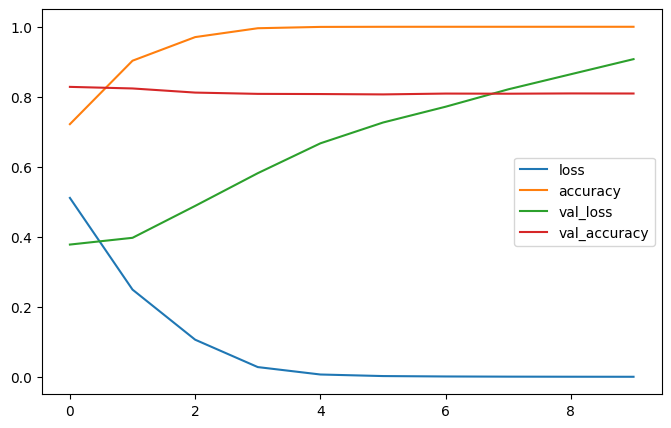

In [14]:
import pandas as pd
from matplotlib import pyplot as plt

pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.show()

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


# GENERATION DE TEXTE

In [15]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [28]:
tokenizer = Tokenizer()

data="Manufacturing Execution Systems MES are crucial in modern manufacturing. They manage and optimize production operations, ensuring efficiency quality and traceability in manufacturing environments. MES solutions are a key part of Industry and the digital transformation of manufacturing At their core MES systems are software applications that connect and integrate various elements of the manufacturing process These systems bridge the gap between the enterprise-level systems like Enterprise Resource Planning or ERP systems and the shop floor equipment and processes They provide real-time data collection analysis and reporting allowing manufacturers to make data-driven decisions and enhance overall productivity Key features and functionalities of MES systems include Production Scheduling MES helps in creating and managing production schedules ensuring that orders are processed efficiently and on time It considers factors like machine availability labor resources and materials Shop Floor Control MES systems monitor and control various operations on the shop floor This includes tracking work-in-progress WIP machine status and work orders Quality Management Quality control is a significant aspect of MES These systems facilitate quality checks data collection and ensure adherence to quality standards They can trigger alerts and notifications when quality issues arise Inventory Management MES systems keep track of raw materials components and finished goods inventory They help in optimizing inventory levels reducing waste and minimizing carrying costs Traceability With MES you can track the entire production process from raw materials to finished products This is crucial for regulatory compliance recall management and quality assurance Data Analytics MES collects vast amounts of data from various sources Advanced analytics and reporting tools help manufacturers gain insights into their operations identify bottlenecks and make informed decisions for process improvement Integration MES systems must seamlessly integrate with other manufacturing systems such as PLCs Programmable Logic Controllers SCADA Supervisory Control and Data Acquisition systems and even IoT devices This ensures a holistic view of the production environment Maintenance Management Predictive maintenance is a growing trend in manufacturing MES systems can monitor the condition of machines and equipment scheduling maintenance activities to prevent breakdowns and minimize downtime Operator Interfaces MES provides user-friendly interfaces for operators and production personnel to interact with the system This includes dashboards alerts and task lists to keep the workforce informed and productive Overall MES systems are instrumental in improving the agility efficiency and competitiveness of manufacturing operations They enable companies to adapt to changing market demands reduce operational costs and enhance product quality As manufacturing processes continue to evolve MES systems will remain at the forefront of innovation and efficiency in the industry"

corpus = data.lower().split("")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'systems': 2, 'mes': 3, 'the': 4, 'of': 5, 'manufacturing': 6, 'to': 7, 'in': 8, 'quality': 9, 'production': 10, 'data': 11, 'are': 12, 'they': 13, 'operations': 14, 'a': 15, 'control': 16, 'this': 17, 'management': 18, 'efficiency': 19, 'various': 20, 'process': 21, 'shop': 22, 'floor': 23, 'materials': 24, 'is': 25, 'can': 26, 'inventory': 27, 'with': 28, 'for': 29, 'maintenance': 30, 'crucial': 31, 'ensuring': 32, 'traceability': 33, 'key': 34, 'industry': 35, 'at': 36, 'their': 37, 'that': 38, 'integrate': 39, 'these': 40, 'enterprise': 41, 'like': 42, 'equipment': 43, 'processes': 44, 'time': 45, 'collection': 46, 'reporting': 47, 'manufacturers': 48, 'make': 49, 'decisions': 50, 'enhance': 51, 'overall': 52, 'scheduling': 53, 'orders': 54, 'on': 55, 'machine': 56, 'monitor': 57, 'includes': 58, 'work': 59, 'alerts': 60, 'keep': 61, 'track': 62, 'raw': 63, 'finished': 64, 'help': 65, 'costs': 66, 'from': 67, 'analytics': 68, 'informed': 69, 'as': 70, 'interfaces': 71, '

In [29]:
data

'Manufacturing Execution Systems MES are crucial in modern manufacturing. They manage and optimize production operations, ensuring efficiency quality and traceability in manufacturing environments. MES solutions are a key part of Industry and the digital transformation of manufacturing At their core MES systems are software applications that connect and integrate various elements of the manufacturing process These systems bridge the gap between the enterprise-level systems like Enterprise Resource Planning or ERP systems and the shop floor equipment and processes They provide real-time data collection analysis and reporting allowing manufacturers to make data-driven decisions and enhance overall productivity Key features and functionalities of MES systems include Production Scheduling MES helps in creating and managing production schedules ensuring that orders are processed efficiently and on time It considers factors like machine availability labor resources and materials Shop Floor C

In [30]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [19]:
# Une portion de phrase tokénizée ((Artificial Intelligence is the combination of several technologies))
print(tokenizer.word_index['artificial'])
print(tokenizer.word_index['intelligence'])
print(tokenizer.word_index['is'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['combination'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['several'])
print(tokenizer.word_index['technologies'])



5
7
12
1
76
4
31
32


In [20]:
print(xs[6])


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 20  4  5 52 53 12  8]


In [21]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [22]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 20  4  5 52 53 12]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [23]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'and': 3, 'of': 4, 'artificial': 5, 'in': 6, 'intelligence': 7, 'that': 8, 'can': 9, 'a': 10, 'more': 11, 'is': 12, 'it': 13, 'they': 14, 'robots': 15, 'this': 16, 'industry': 17, 'for': 18, 'many': 19, 'one': 20, 'enable': 21, 'learn': 22, 'from': 23, 'activities': 24, 'out': 25, 'their': 26, 'be': 27, '4': 28, '0': 29, 'understand': 30, 'several': 31, 'technologies': 32, 'which': 33, 'allow': 34, 'or': 35, 'human': 36, 'industrial': 37, 'also': 38, 'ai': 39, 'perform': 40, 'tasks': 41, 'not': 42, 'are': 43, 'way': 44, 'you': 45, 'need': 46, 'with': 47, 'complex': 48, 'has': 49, 'advantages': 50, 'manufacturing': 51, 'intelligence’s': 52, 'qualities': 53, 'data': 54, 'collect': 55, 'carried': 56, 'factory': 57, 'thus': 58, 'improve': 59, 'skills': 60, 'every': 61, 'interaction': 62, 'considered': 63, 'fundamental': 64, 'bases': 65, 'after': 66, 'all': 67, 'will': 68, 'help': 69, 'make': 70, 'factories': 71, 'autonomous': 72, 'productive': 73, 'how': 74, 'works': 75

In [31]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
14/14 [==============================] - 10s 331ms/step - loss: 5.3847 - accuracy: 0.0211
Epoch 2/500
14/14 [==============================] - 5s 321ms/step - loss: 5.3557 - accuracy: 0.0728
Epoch 3/500
14/14 [==============================] - 4s 287ms/step - loss: 5.2694 - accuracy: 0.0728
Epoch 4/500
14/14 [==============================] - 4s 323ms/step - loss: 5.1183 - accuracy: 0.0728
Epoch 5/500
14/14 [==============================] - 5s 311ms/step - loss: 5.0062 - accuracy: 0.0728
Epoch 6/500
14/14 [==============================] - 4s 279ms/step - loss: 4.9633 - accuracy: 0.0728
Epoch 7/500
14/14 [==============================] - 7s 518ms/step - loss: 4.9408 - accuracy: 0.0728
Epoch 8/500
14/14 [==============================] - 6s 441ms/step - loss: 4.9259 - accuracy: 0.0728
Epoch 9/500
14/14 [==============================] - 5s 340ms/step - loss: 4.9126 - accuracy: 0.0728
Epoch 10/500
14/14 [==============================] - 5s 311ms/step - loss: 4.8977 - accur

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

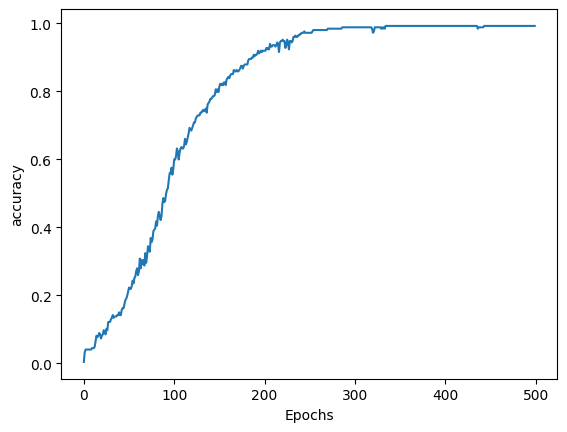

In [26]:
plot_graphs(history, 'accuracy')


In [33]:
test_text = "MES can perform"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([test_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list, verbose=0)
  predicted_class = np.argmax(predicted)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted_class:
      output_word = word
      #break
      test_text += " " + output_word
  print(test_text)

MES can perform mes
MES can perform mes collects
MES can perform mes collects vast
MES can perform mes collects vast amounts
MES can perform mes collects vast amounts of
MES can perform mes collects vast amounts of data
MES can perform mes collects vast amounts of data analytics
MES can perform mes collects vast amounts of data analytics mes
MES can perform mes collects vast amounts of data analytics mes these
MES can perform mes collects vast amounts of data analytics mes these systems
MES can perform mes collects vast amounts of data analytics mes these systems are
MES can perform mes collects vast amounts of data analytics mes these systems are monitor
MES can perform mes collects vast amounts of data analytics mes these systems are monitor and
MES can perform mes collects vast amounts of data analytics mes these systems are monitor and the
MES can perform mes collects vast amounts of data analytics mes these systems are monitor and the and
MES can perform mes collects vast amounts 

In [ ]:
  print('\nle texte genéré à partir de ce morceau de phrase est le suivant ------------------------- : \n',test_text)


le texte genéré à partir de ce morceau de phrase est le suivant ------------------------- : 
 artificial intelligence can perform can achieve higher efficiency compared to human labor labor labor labor which labor labor with industry 0 all 4 factories autonomous 4 it 4 factory factory productive factories and thus improve their skills in a interaction interaction interaction interaction interaction interaction interaction interaction interaction interaction interaction interaction interaction interaction interaction productive interaction these industrial robots are not that smart smart for example area area area that microscopic components raw or microscopic components improve components components components components components components components components components components components components components components components raw materials or microscopic components components components components components components components components


###**Exercice 1 Pratique NLP   classification (Lab_08)**

#Étape 1 : Collecte des données
Dans cette première étape, Vous allez collecter des données textuelles. Vous pouvez utiliser des jeux de données existants ou collecter vos propres données

#Étape 2 : Prétraitement des données
Dans cette étape, vous effectuez les tâches de prétraitement sur les données textuelles.

#Étape 3 : Vectorisation du texte
Vous pouvez maintenant utiliser une couche d'embedding pour créer une représentation vectorielle dense des mots.

#Étape 4 : Création d'un modèle de traitement du texte
Vous allez concevoir un modèle de réseau neuronal pour effectuer la classification de texte.

# Étape 5 : Entraînement du modèle
Entraînons le modèle sur les données d'entraînement.

# Étape 6 : Validation du modèle
Evaluons la performance du modèle sur des données de validation.

# Étape 7 : Prédictions
Nous utilisons le modèle entraîné pour faire des prédictions sur de nouvelles données jamais vues.

# Étape 8 : Optimisation et Amélioration
Essayons d'méliorer le modèle en jouant sur les différents paramètres !


In [ ]:
## VOTRE CODE ICI ##

###**Exercice 2 Pratique NLP   génération de texte (Lab_08)**


Nous allons créer ci-dessous un modèle qui génère du texte spécialisé dans votre corpus personnel. Il est peut être simple de choisir un corpus standard ou votre projet PFA.

Les étapes à suivre sont celles du cours.

In [ ]:
## VOTRE CODE ICI ##